<a href="https://colab.research.google.com/github/aanchal-29/ImageProcessing/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the desired case (1-10): 7


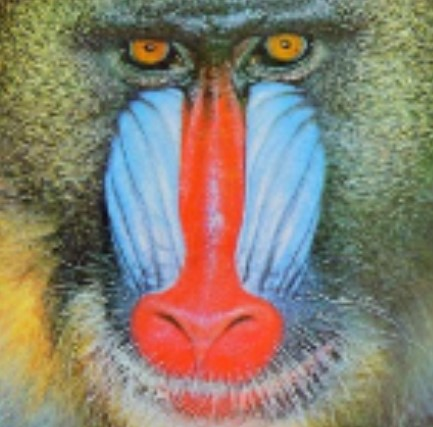

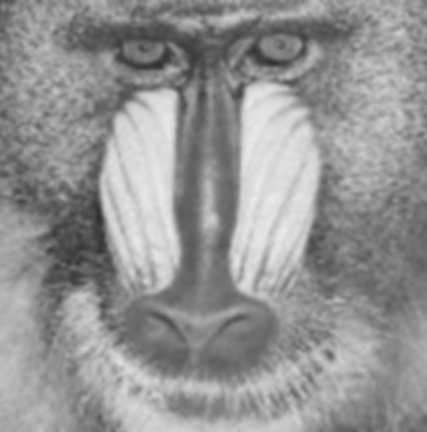

Original variance: 2476.787886870401
Attacked variance: 2318.34954590545
Restored variance: 1412.3057726511004
The original image has the highest variance.


In [ ]:
import cv2
import numpy as np
import pywt
from google.colab.patches import cv2_imshow
def convert_to_grayscale(image):
    # Calculate grayscale values using the formula: Y = 0.299*R + 0.587*G + 0.114*B
    grayscale_image = np.dot(image[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)
    return grayscale_image

def median_blur(grayscale_image, kernel_size):
    # Apply median blur filter
    blurred_image = np.zeros_like(grayscale_image)
    padded_image = np.pad(grayscale_image, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), mode='edge')

    for i in range(blurred_image.shape[0]):
        for j in range(blurred_image.shape[1]):
            kernel = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            blurred_image[i, j] = np.median(kernel)

    return blurred_image

def wiener_filter(grayscale_image, kernel_size, noise_variance):
    # Apply Wiener filter
     kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

    # Pad the image to handle border effects
     padded_image = np.pad(grayscale_image, kernel_size // 2, mode='constant')

    # Apply Wiener filter
     filtered_image = np.zeros_like(grayscale_image)
     for i in range(grayscale_image.shape[0]):
        for j in range(grayscale_image.shape[1]):
            patch = padded_image[i:i+kernel_size, j:j+kernel_size]
            patch_mean = np.mean(patch)
            patch_variance = np.var(patch)
            k = patch_variance / (patch_variance + noise_variance)
            filtered_image[i, j] = patch_mean + k * (grayscale_image[i, j] - patch_mean)

     return filtered_image

def deconvolution(grayscale_image, kernel):
    # Apply deconvolution filter
    kernel = np.rot90(kernel, 2)
    deconvolved_image = cv2.filter2D(grayscale_image, -1, kernel)  #-1 is depth of image means same it's same as input

    return deconvolved_image

def wavelet_transform(grayscale_image):
    # Apply wavelet-based filtering
    coeffs = pywt.dwt2(grayscale_image, 'haar')
    wavelet_filtered_image = coeffs[0]

    return wavelet_filtered_image

def create_CLAHE(clip_limit, tile_grid_size):
    # Create a CLAHE object
    clahe = {
        'clip_limit': clip_limit,
        'tile_grid_size': tile_grid_size
    }

    return clahe

def apply_CLAHE(grayscale_image, clahe):
    # Apply the CLAHE filter
    clahe_object = cv2.createCLAHE(clipLimit=clahe['clip_limit'], tileGridSize=clahe['tile_grid_size'])
    cls_filtered_image = clahe_object.apply(grayscale_image)

    return cls_filtered_image

def histogram_equalization(grayscale_image):
    # Apply histogram equalization
    hist, bins = np.histogram(grayscale_image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equalized_image = np.interp(grayscale_image.flatten(), bins[:-1], cdf_normalized).reshape(grayscale_image.shape)

    return equalized_image.astype(np.uint8)

def smoothing(grayscale_image, kernel_size):
    # Apply smoothing filter
    smoothed_image = np.zeros_like(grayscale_image)

    padded_image = np.pad(grayscale_image, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), mode='edge')
    for i in range(smoothed_image.shape[0]):
        for j in range(smoothed_image.shape[1]):
            kernel = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            smoothed_image[i, j] = np.mean(kernel)

    return smoothed_image

def noise_reduction(grayscale_image, kernel_size):
    # Apply noise reduction filter
    blurred_image = np.zeros_like(grayscale_image)
    padded_image = np.pad(grayscale_image, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), mode='edge')

    for i in range(blurred_image.shape[0]):
        for j in range(blurred_image.shape[1]):
            kernel = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            blurred_image[i, j] = np.median(kernel)

    return blurred_image

def edge_detection(grayscale_image, threshold1, threshold2):
    # Apply edge detection filter
    dx = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx2 + dy2)
    edge_detected_image = np.zeros_like(grayscale_image)
    edge_detected_image[(gradient_magnitude >= threshold1) & (gradient_magnitude <= threshold2)] = 255

    return edge_detected_image.astype(np.uint8)
def sharpening(grayscale_image, alpha, kernel_size):
    # Apply sharpening filter
    blurred_image = cv2.blur(grayscale_image, (kernel_size, kernel_size))
    sharpened_image = cv2.addWeighted(grayscale_image, 1.0 + alpha, blurred_image, -alpha, 0)

    return sharpened_image

# Read the original and attacked images
original_image = cv2.imread("image.jpg")
attacked_image = cv2.imread("attacked_image.jpg")

# Convert images to grayscale
original_grayscale = convert_to_grayscale(original_image)
attacked_grayscale = convert_to_grayscale(attacked_image)

# Create a switch case to select the image enhancement or restoration technique
case = int(input("Enter the desired case (1-10): "))  # Specify the desired case

if case == 1:
    # Apply the median blur filter
    blurred_image = median_blur(attacked_grayscale, 5)

elif case == 2:
    # Apply the Wiener filter
    kernel_size = min(attacked_grayscale.shape[0], attacked_grayscale.shape[1])  # Adjust kernel size based on image shape
    noise_variance = 0.01
    wiener_filtered_image = wiener_filter(attacked_grayscale, kernel_size, noise_variance)
    #wiener_filtered_image = wiener_filter(attacked_grayscale, 5, 0.01)

elif case == 3:
    # Apply the deconvolution filter
    kernel = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    deconvolved_image = deconvolution(attacked_grayscale, kernel)

elif case == 4:
    # Apply the wavelet based filtering
    wavelet_filtered_image = wavelet_transform(attacked_grayscale)

elif case == 5:
    # Apply the constrained least squares filter
    clahe = create_CLAHE(clip_limit=2.0, tile_grid_size=(8, 8))
    cls_filtered_image = apply_CLAHE(attacked_grayscale, clahe)

elif case == 6:
    # Apply the histogram equalization filter
    equalized_image = histogram_equalization(attacked_grayscale)

elif case == 7:
    # Apply the smoothing filter
    smoothed_image = smoothing(attacked_grayscale, 5)

elif case == 8:
    # Apply the noise reduction filter
    noise_reduced_image = noise_reduction(attacked_grayscale, 5)

elif case == 9:
    # Apply the edge detection filter
    threshold1 = 100
    threshold2 = 200
    dx = cv2.Sobel(attacked_grayscale, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(attacked_grayscale, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx*2 + dy*2)
    edge_detected_image = np.zeros_like(attacked_grayscale)
    edge_detected_image[(gradient_magnitude >= threshold1) & (gradient_magnitude <= threshold2)] = 255

    #edge_detected_image = edge_detection(attacked_grayscale, 100, 200)

elif case == 10:
    # Apply the sharpening filter
    sharpened_image = sharpening(attacked_grayscale, 1.5, 5)

# Compare the original image with the enhanced or restored images
cv2_imshow(original_image)

if case == 1:
    cv2_imshow(blurred_image)
elif case == 2:
    cv2_imshow(wiener_filtered_image)
elif case == 3:
    cv2_imshow(deconvolved_image)
elif case == 4:
    cv2_imshow(wavelet_filtered_image)
elif case == 5:
    cv2_imshow(cls_filtered_image)
elif case == 6:
    cv2_imshow(equalized_image)
elif case == 7:
    cv2_imshow(smoothed_image)
elif case == 8:
    cv2_imshow(noise_reduced_image)
elif case == 9:
    cv2_imshow(edge_detected_image)
elif case == 10:
    cv2_imshow(sharpened_image)

# Wait for the user to press a key
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

# Calculate the variance of the original, attacked, and restored images
original_variance = np.var(original_image)
attacked_variance = np.var(attacked_image)
restored_variance = np.var(blurred_image) if case == 1 else np.var(wiener_filtered_image) if case == 2 else \
                   np.var(deconvolved_image) if case == 3 else np.var(wavelet_filtered_image) if case == 4 else \
                   np.var(cls_filtered_image) if case == 5 else np.var(equalized_image) if case == 6 else \
                   np.var(smoothed_image) if case == 7 else np.var(noise_reduced_image) if case == 8 else \
                   np.var(edge_detected_image) if case == 9 else np.var(sharpened_image)

# Print the variances
print("Original variance:", original_variance)
print("Attacked variance:", attacked_variance)
print("Restored variance:", restored_variance)

# Compare the variances
if original_variance > attacked_variance and original_variance > restored_variance:
    print("The original image has the highest variance.")
elif attacked_variance > original_variance and attacked_variance > restored_variance:
    print("The attacked image has the highest variance.")
else:
    print("The restored image has the highest variance.")